- Martin Navarrete Villegas
- 1343696
- FCFM - UANL

# Analisis, visualizacion y prediccion de Precios Airbnb

## Librerias

In [36]:
#Importamos las librerias basicas y necesarias
import pandas as pd #Libreria de manipulacion de datos
import numpy as np #Libreria numerica muy potente
import matplotlib.pyplot as plt #Libreria para graficos
import seaborn as sns #Libreria para graficos basada en Matplotlib (es mas simple)

## Lectura de datos

In [37]:
df_airbnb=pd.read_csv('AB_NYC_2019.csv')
df_airbnb.head(6) #Vemos los primeros 6 datos para ver que se cargaron correctamente


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


## Analisis de datos exploratorios

In [38]:
# Filas y columnas
df_airbnb.shape

(48895, 16)

In [39]:
df_airbnb.columns 

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [40]:
print("cantidad de barrios:", len(df_airbnb["neighbourhood_group"].unique())) 


cantidad de barrios: 5


In [41]:
# Brinda los estadisticos basicos de las columnas seleccionadas
df_airbnb[["minimum_nights","price","availability_365"]].describe()

,minimum_nights,price,availability_365
count,48895.000000,48895.000000,48895.000000
mean,7.029962,152.720687,112.781327
std,20.510550,240.154170,131.622289
min,1.000000,0.000000,0.000000
25%,1.000000,69.000000,0.000000
50%,3.000000,106.000000,45.000000
75%,5.000000,175.000000,227.000000
max,1250.000000,10000.000000,365.000000


In [42]:
#De esta forma vemos el total de valores NaN en nuestro dataset
#Si no se utiliza el sum() va a devolver la condicion True o False de los campos
df_airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Observamos que las columnas que contienen información sobre las fechas de los comentarios y las cantidades de comentarios por mes presentan valores ausentes (NaN). Debido a que estas columnas no aportan información representativa para nuestro análisis actual, se procederá a su eliminación.

En el caso de que nos encontremos con características (features) relevantes para nuestro análisis que presenten valores ausentes, se pueden aplicar diversas estrategias para reemplazar dichos valores. Por ejemplo, en el caso específico de la columna "last_review" del conjunto de datos "df_airbnb", se puede utilizar la función "fillna()" para reemplazar los valores NaN por información relevante. Cabe mencionar que existen otras estrategias para abordar los valores ausentes, las cuales se pueden investigar a medida que surjan problemas específicos.

Analicemos el porcentaje de valores ausentes (NaN) en nuestro conjunto de datos para determinar su impacto en el análisis. Si el porcentaje es bajo, se puede proceder a eliminar los valores NaN del conjunto de datos sin afectar significativamente los resultados.

Para obtener el porcentaje de valores NaN en nuestro conjunto de datos, se puede utilizar la siguiente fórmula:

```porcentaje_NaN = (cantidad_de_NaN / tamaño_del_dataset) * 100```

Donde "cantidad_de_NaN" es el número de valores ausentes y "tamaño_del_dataset" es la cantidad total de valores en nuestro conjunto de datos.

Una vez obtenido el porcentaje de valores NaN, se puede comparar con un umbral establecido previamente para determinar si es necesario eliminarlos o si se pueden imputar valores en su lugar.

Es importante mencionar que la eliminación de valores NaN puede afectar el tamaño de nuestro conjunto de datos y, por lo tanto, reducir la cantidad de información disponible para el análisis. Por lo tanto, es importante evaluar cuidadosamente el impacto de esta decisión en el análisis global.

En resumen, se puede determinar el porcentaje de valores NaN en nuestro conjunto de datos para determinar si es necesario eliminarlos o si se pueden imputar valores en su lugar. Es importante tener en cuenta el impacto que la eliminación de valores NaN puede tener en el tamaño y la calidad de nuestro conjunto de datos.

In [43]:
df_airbnb.isna().sum()/df_airbnb.shape[0]*100


id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [44]:
# Eliminamos todas las columnas que no son necesarias para nuestro analisis
df_airbnb.drop(['name','id','host_name','last_review','reviews_per_month','calculated_host_listings_count'], axis=1, inplace=True)
# AXIS es = 1 (columna), 0 (fila)

In [45]:
#Agrupamos por "neighbourhood_group" y mostramos el precio mas alto por barrio
df_airbnb.groupby(['neighbourhood_group'])[["price"]].max()

,price
neighbourhood_group,
Bronx,2500
Brooklyn,10000
Manhattan,10000
Queens,10000
Staten Island,5000


# Visualizacion

In [46]:
df_airbnb.columns


Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'availability_365'],
      dtype='object')

c:\Users\martin_navarrete\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\martin_navarrete\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\martin_navarrete\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-le

<AxesSubplot:title={'center':'Distribucion de la cantidad de reviews'}, xlabel='number_of_reviews', ylabel='Density'>

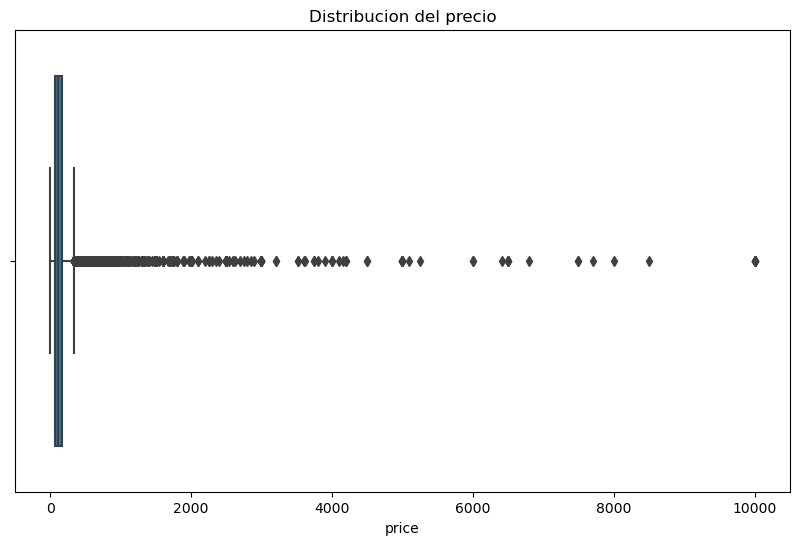

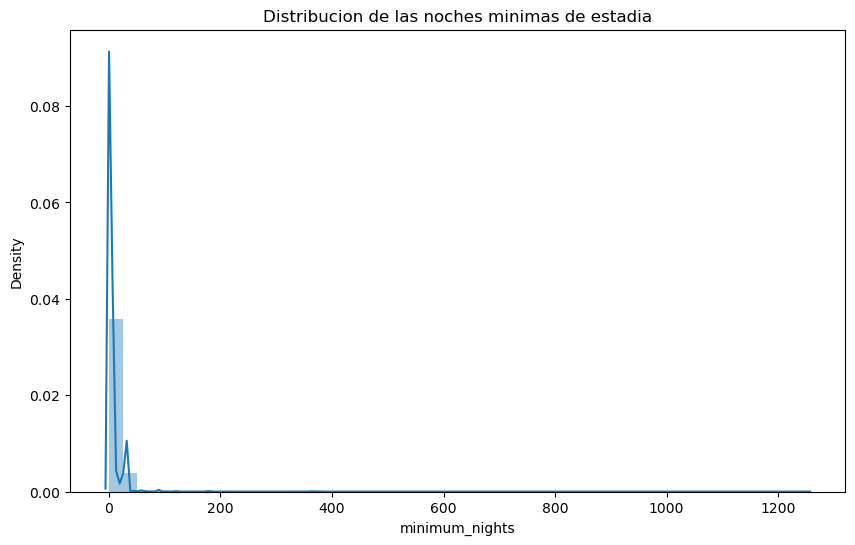

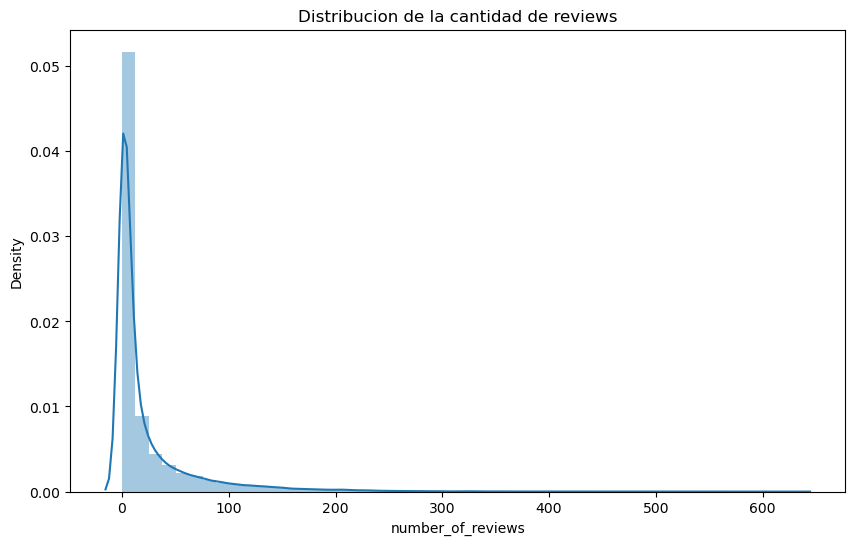

In [47]:
plt.figure(1, figsize=(10,6)) #Tamaño del grafico
plt.title("Distribucion del precio") #Titulo
sns.boxplot(df_airbnb["price"]) #Grafico, en este caso estamos usando la libreria seaborn

plt.figure(2, figsize=(10,6))
plt.title("Distribucion de las noches minimas de estadia")
sns.distplot(df_airbnb["minimum_nights"])

plt.figure(3, figsize=(10,6))
plt.title("Distribucion de la cantidad de reviews")
sns.distplot(df_airbnb["number_of_reviews"])

Los primeros gráficos sugieren la presencia de valores atípicos (outliers) en el conjunto de datos. El primer gráfico muestra un valor máximo de USD 10.000 por noche, lo cual no parece tener sentido para nuestro análisis. El segundo gráfico muestra una estadía mínima de 1250 días, lo que sugiere que el propietario está pidiendo una renta a largo plazo que no se ajusta a la plataforma de Airbnb. En la última gráfica, la mayoría de los valores son cero, lo cual podría explicarse por la falta de comentarios de algunos clientes. En resumen, se observan valores atípicos en los datos que deben ser tratados para evitar distorsiones en nuestro análisis.

# Limpiando outliers

In [48]:
# Eliminamos valores extremos en el precio
p10 = np.percentile(df_airbnb["price"], 10)
p90 = np.percentile(df_airbnb["price"], 90)
df_airbnb = df_airbnb[(df_airbnb["price"] >= p10) & (df_airbnb["price"] <= p90)]

In [49]:
# Eliminamos valores extremos en la cantidad de noches minimas
p10 = np.percentile(df_airbnb["minimum_nights"], 10)
p90 = np.percentile(df_airbnb["minimum_nights"], 90)
df_airbnb = df_airbnb[(df_airbnb["minimum_nights"] >= p10) & (df_airbnb["minimum_nights"] <= p90)]

Regraficamos


c:\Users\martin_navarrete\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\martin_navarrete\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribucion de las noches minimas de estadia'}, xlabel='minimum_nights', ylabel='Density'>

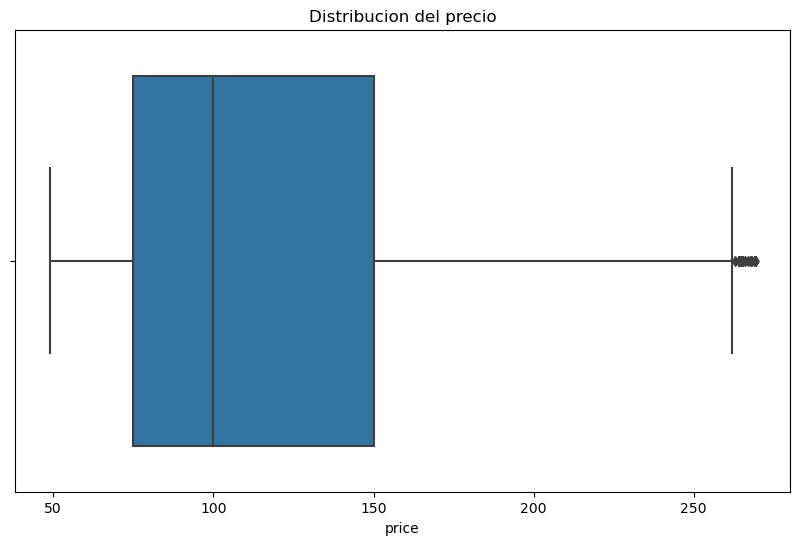

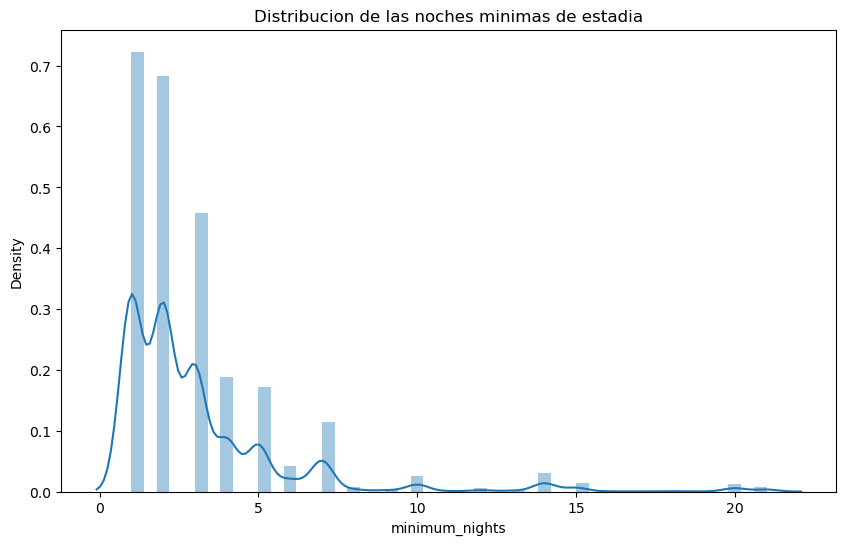

In [50]:
plt.figure(1, figsize=(10,6)) #Tamaño del grafico
plt.title("Distribucion del precio") #Titulo
sns.boxplot(df_airbnb["price"]) #Grafico, en este caso estamos usando la libreria seaborn

plt.figure(2, figsize=(10,6))
plt.title("Distribucion de las noches minimas de estadia")
sns.distplot(df_airbnb["minimum_nights"])

Vemos que ahora se ve un poco mejor la distribución de nuestros datos

# Analisis

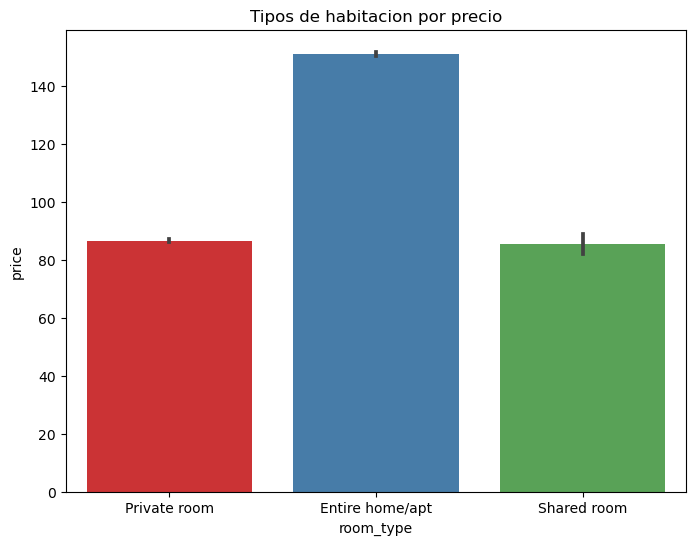

In [51]:
plt.figure(figsize=(8,6))
plt.title("Tipos de habitacion por precio")
sns.barplot(y='price',x='room_type',data=df_airbnb, palette="Set1")
plt.show()

Se puede observar que el precio de alquilar una habitación privada y una compartida es similar, mientras que el precio de alquilar una casa completa es casi el doble. Además, se procederá a explorar los distintos barrios de Nueva York.

c:\Users\martin_navarrete\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Cantidad de alojamientos por barrio'}, xlabel='neighbourhood_group', ylabel='count'>

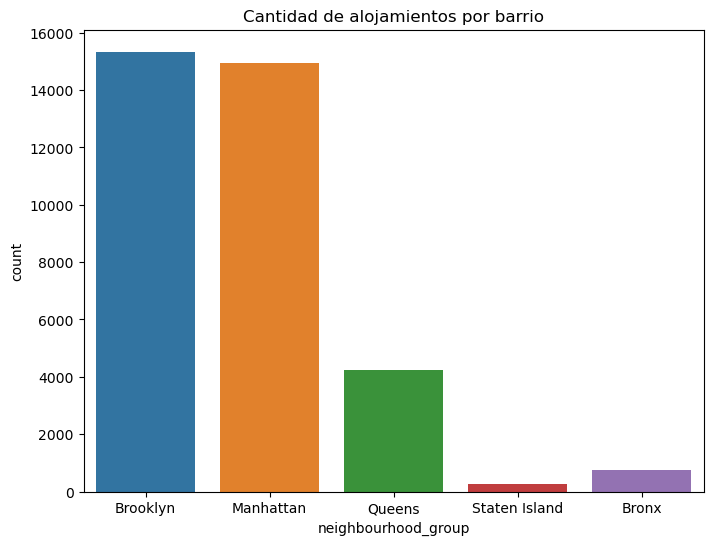

In [52]:
plt.figure(figsize=(8,6))
plt.title("Cantidad de alojamientos por barrio")
sns.countplot(df_airbnb['neighbourhood_group'])

¿A que barrio tenemos que ir si queremos alquilar una casa completa al menor precio?

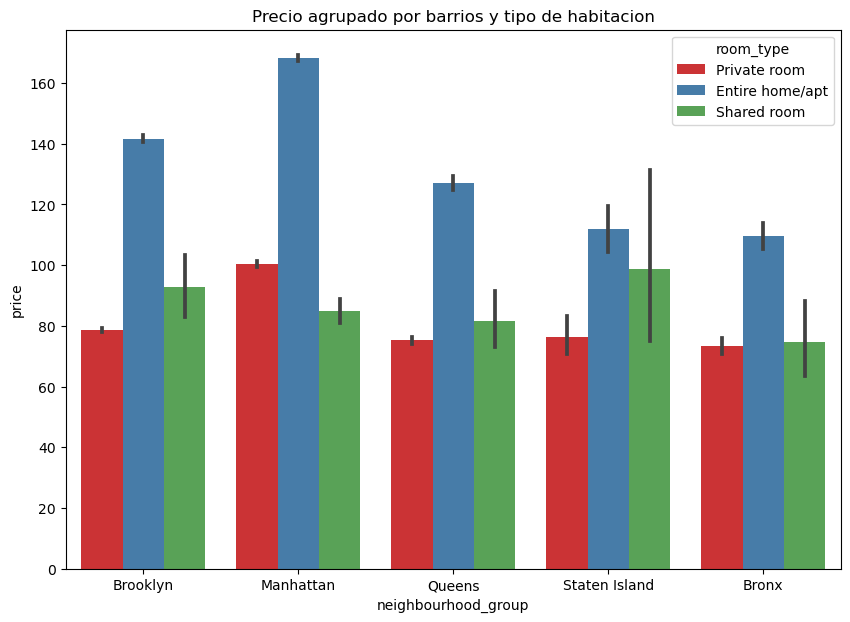

In [53]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y="price", hue = "room_type",data = df_airbnb, palette="Set1")
plt.title("Precio agrupado por barrios y tipo de habitacion")
plt.show()

Bronx es el barrio con precios mas bajos

En este dataset tenemos las columnas latitude y longitude, esto nos indica que podemos graficar las coordenadas de los alojamientos y barrios que tenemos.

Tomemos estos datos y grafiquemoslos divididos por barrio

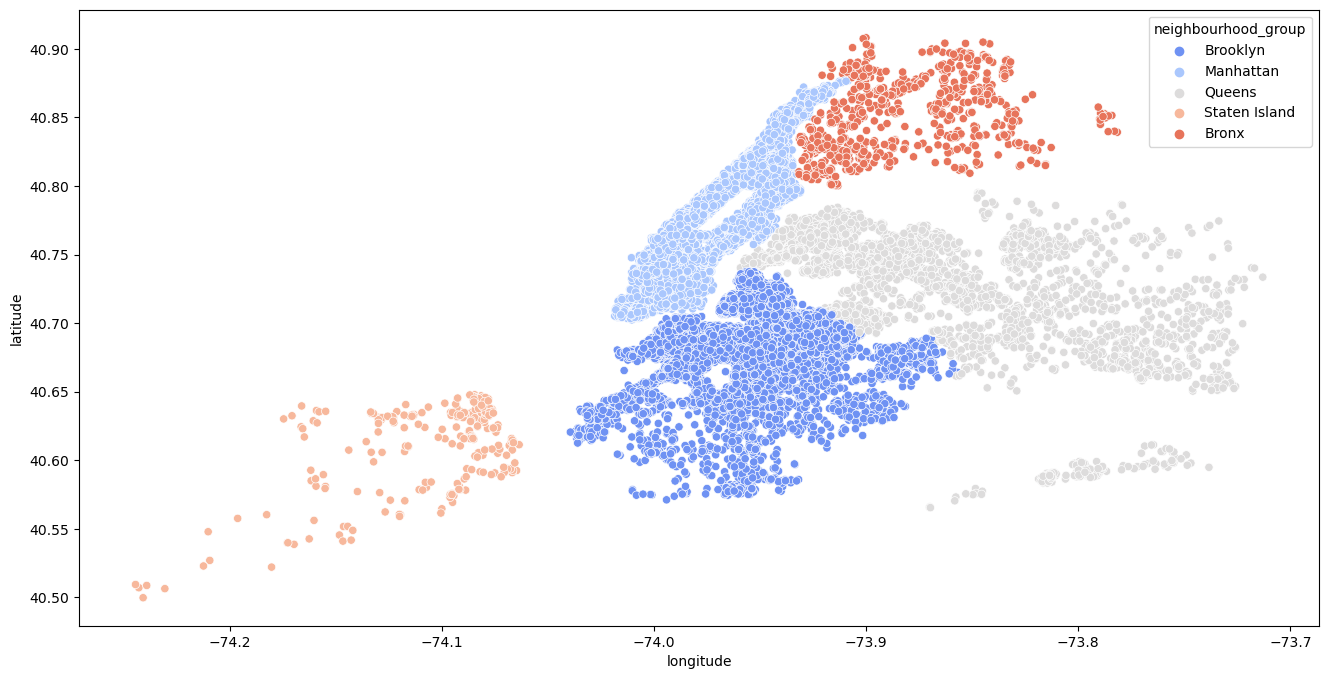

In [54]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df_airbnb["latitude"],x=df_airbnb["longitude"],hue=df_airbnb["neighbourhood_group"],palette="coolwarm")
plt.show()

El mapa de Nueva York se asemeja a la forma de la ciudad. Este es solo un acercamiento básico y ahora pasaremos a la próxima etapa.

# Feature Engineering

En el conjunto de datos, existen variables categóricas como los barrios y tipos de habitaciones. Para analizar estas variables, se puede transformar cada categoría en una columna y asignar un valor de 1 si el alojamiento está ubicado en ese barrio o si tiene ese tipo de habitación, y un valor de 0 en caso contrario. De esta manera, se pueden analizar estas variables en relación con otras variables numéricas y obtener información útil para el análisis.

In [55]:
# Estas son las columnas categoricas
df_airbnb_cat = df_airbnb[["neighbourhood_group","neighbourhood","room_type"]]
df_airbnb_cat.head()

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt


Podemos armar un diccionario y mapearlo a nuestro dataset



In [56]:
dic_room_type = {
    "Private room":0,
    "Entire home/apt":1,
    "Shared room":2
}
#Con la funcion map unimos el diccionario a nuestro dataset agregandolo a una nueva columna "dic_room_type"
df_airbnb_cat['dic_room_type'] = df_airbnb_cat['room_type'].map(dic_room_type) 

C:\Users\martin_navarrete\AppData\Local\Temp\ipykernel_27684\1387685100.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airbnb_cat['dic_room_type'] = df_airbnb_cat['room_type'].map(dic_room_type)


In [57]:
df_airbnb_cat.head()


,neighbourhood_group,neighbourhood,room_type,dic_room_type
0,Brooklyn,Kensington,Private room,0
1,Manhattan,Midtown,Entire home/apt,1
2,Manhattan,Harlem,Private room,0
3,Brooklyn,Clinton Hill,Entire home/apt,1
4,Manhattan,East Harlem,Entire home/apt,1


Transformar las variables categóricas en columnas binarias no es conveniente ya que algunas categorías tendrán más peso que otras. Esto puede ser útil para variables categóricas ordinales, como las alertas de baja, media y alta, o las notas A, B, C, D, E y F. En este caso, se creará un dataframe de variables ficticias (dummy) para evitar este problema.

In [58]:
neighbourhood_dummy = pd.get_dummies(df_airbnb_cat["neighbourhood_group"])
neighbourhood_dummy.head()

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [59]:
df_airbnb_cat = pd.concat([df_airbnb_cat, neighbourhood_dummy], axis=1) #Unimos nuestro "neighbourhood_dummy" al "df_airbnb_cat"
df_airbnb_cat.head()

,neighbourhood_group,neighbourhood,room_type,dic_room_type,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,Brooklyn,Kensington,Private room,0,0,1,0,0,0
1,Manhattan,Midtown,Entire home/apt,1,0,0,1,0,0
2,Manhattan,Harlem,Private room,0,0,0,1,0,0
3,Brooklyn,Clinton Hill,Entire home/apt,1,0,1,0,0,0
4,Manhattan,East Harlem,Entire home/apt,1,0,0,1,0,0


In [60]:
# Eliminamos las columnas que ahora son dummies
df_airbnb_cat.drop(['neighbourhood_group',"neighbourhood","room_type","dic_room_type"], axis=1, inplace=True)

In [61]:
# Corregimos el room_type"
room_type_d = pd.get_dummies(df_airbnb["room_type"])


In [62]:
# Unimos todos los dataframe
df_airbnb = pd.concat([df_airbnb, neighbourhood_dummy,room_type_d], axis=1)


In [63]:
# Eliminamos las columnas que ya no necesitamos
df_airbnb.drop(['neighbourhood_group',"neighbourhood","room_type"], axis=1, inplace=True)

In [64]:
df_airbnb.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,2787,40.64749,-73.97237,149,1,9,365,0,1,0,0,0,0,1,0
1,2845,40.75362,-73.98377,225,1,45,355,0,0,1,0,0,1,0,0
2,4632,40.80902,-73.94190,150,3,0,365,0,0,1,0,0,0,1,0
3,4869,40.68514,-73.95976,89,1,270,194,0,1,0,0,0,1,0,0
4,7192,40.79851,-73.94399,80,10,9,0,0,0,1,0,0,1,0,0


## Prediccion

### Separacion de datos de entrenamiento y prueba

In [65]:
from sklearn.model_selection import train_test_split

y = df_airbnb['price']
x= df_airbnb.drop(['price'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)

### Modelado

#### Regresion Lineal

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics


linreg = LinearRegression()
linreg.fit(x_train,y_train)
y_pred=(linreg.predict(x_test))

print('R-squared train score: {:.3f}'.format(linreg.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(linreg.score(x_test, y_test)))
print('RMSE score: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

R-squared train score: 0.440
R-squared test score: 0.451
RMSE score: 40.587


#### Ridge Regression

In [67]:
from sklearn.linear_model import Ridge
from sklearn import metrics

ridge = Ridge()
ridge.fit(x_train, y_train)

y_pred=ridge.predict(x_test)

print('R-squared train score: {:.3f}'.format(ridge.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(ridge.score(x_test, y_test)))
print('RMSE score: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

R-squared train score: 0.440
R-squared test score: 0.451
RMSE score: 40.578


c:\Users\martin_navarrete\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.34915e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


#### Lasso Regression


In [68]:
from sklearn.linear_model import Lasso
from sklearn import metrics
lasso = Lasso(alpha=10,max_iter = 10000)
lasso.fit(x_train, y_train)

print('R-squared score (training): {:.3f}'.format(lasso.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(lasso.score(x_test, y_test)))
print('RMSE score: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

R-squared score (training): 0.214
R-squared score (test): 0.219
RMSE score: 40.578


#### Decision Tree Regressor

In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
est = DTree.fit(x_train,y_train)

print('R-squared score (training): {:.3f}'.format(DTree.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(DTree.score(x_test, y_test)))
print('RMSE score: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
# print(est.summary())

R-squared score (training): 0.813
R-squared score (test): 0.289
RMSE score: 40.578


#### Random forest Regressor

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
regressor = RandomForestClassifier()
regressor.fit(x_train, y_train)

print('R-squared score (training): {:.3f}'.format(regressor.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(regressor.score(x_test, y_test)))
print('RMSE score: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

R-squared score (training): 1.000
R-squared score (test): 0.101
RMSE score: 40.578
